In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# Read the csv files into a pandas DataFrame
data_p = pd.read_csv('data/population_data.csv')
data_c = pd.read_csv('data/co2_ppm.csv')

In [11]:
# Preview the population dataset
data_p.head()

,Unnamed: 0,Year,population_millions
0,0,1993,5581597.598
1,1,1994,5663150.428
2,2,1995,5744212.930
3,3,1996,5824891.931
4,4,1997,5905045.647


In [12]:
# Preview the CO2 dataset
data_c.head()

,Unnamed: 0,Year,CO2_concentration_per_million
0,0,1993,357.10
1,1,1994,358.83
2,2,1995,360.82
3,3,1996,362.61
4,4,1997,363.73


In [14]:
merge_table = pd.merge(data_p, data_c, on="Year", how="left")
merge_table

,Unnamed: 0_x,Year,population_millions,Unnamed: 0_y,CO2_concentration_per_million
0,0,1993,5581597.598,0,357.10
1,1,1994,5663150.428,1,358.83
2,2,1995,5744212.930,2,360.82
3,3,1996,5824891.931,3,362.61
4,4,1997,5905045.647,4,363.73
5,5,1998,5984794.075,5,366.70
6,6,1999,6064239.033,6,368.38
7,7,2000,6143493.806,7,369.55
8,8,2001,6222626.531,8,371.14
9,9,2002,6301773.172,9,373.28


In [15]:
data_df = merge_table[['population_millions', 'CO2_concentration_per_million']]
data_df

,population_millions,CO2_concentration_per_million
0,5581597.598,357.10
1,5663150.428,358.83
2,5744212.930,360.82
3,5824891.931,362.61
4,5905045.647,363.73
5,5984794.075,366.70
6,6064239.033,368.38
7,6143493.806,369.55
8,6222626.531,371.14
9,6301773.172,373.28


In [16]:
X = data_df.population_millions.values.reshape(-1, 1)
y = data_df.CO2_concentration_per_million.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (23, 1) (23, 1)


array([[5581597.598],
       [5663150.428],
       [5744212.93 ],
       [5824891.931],
       [5905045.647],
       [5984794.075],
       [6064239.033],
       [6143493.806],
       [6222626.531],
       [6301773.172],
       [6381185.141],
       [6461159.391],
       [6541906.956],
       [6623517.917],
       [6705946.643],
       [6789088.672],
       [6872766.988],
       [6956823.588],
       [7041194.168],
       [7125827.957],
       [7210582.041],
       [7295290.759],
       [7379796.967]])

Text(0, 0.5, 'CO2 Parts per Million')

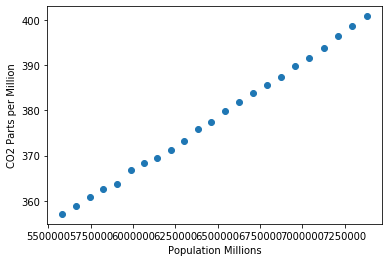

In [29]:
plt.scatter(X, y) 
plt.xlabel("Population Millions")
plt.ylabel("CO2 Parts per Million")

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
predicted = model.predict(X_test)

In [46]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[2.43860039e-05]]
y-axis intercept:  [220.33437679]


In [47]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")


Min X Value: [[5581597.598]]
Max X Value: [[7379796.967]]


In [48]:
# Calculate the predicted y_min and y_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)


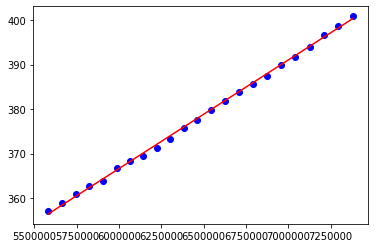

In [49]:
# Plot the original X and y data using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


In [50]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [357.1]
Predicted output: [356.44723785]
Prediction Error: [-0.65276215]


In [52]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")


Mean Squared Error: 0.322961059010396
R2: 0.9971831758912286
